In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate

In [57]:
wbcd_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
wbcd_columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion',
                'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
wbcd = pd.read_csv(wbcd_url, names=wbcd_columns)
wbcd.replace('?', np.nan, inplace=True)
wbcd['bare_nuclei'] = wbcd['bare_nuclei'].astype(float)
X_wbcd = wbcd.iloc[:, 1:-1]
y_wbcd = wbcd['class'].map({2: 0, 4: 1})
print("WBCD Missing Values:\n", wbcd.isnull().sum())
print("WBCD Shape:", X_wbcd.shape, y_wbcd.shape)
print("WBCD Class Distribution:", pd.Series(y_wbcd).value_counts().to_dict())

WBCD Missing Values:
 id                         0
clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64
WBCD Shape: (699, 9) (699,)
WBCD Class Distribution: {0: 458, 1: 241}


In [58]:
wpbc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'
wpbc_columns = ['id', 'outcome', 'time', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
                'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points',
                'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter',
                'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points',
                'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points',
                'worst_symmetry', 'worst_fractal_dimension', 'tumor_size', 'lymph_node_status']
wpbc = pd.read_csv(wpbc_url, names=wpbc_columns)
wpbc.replace('?', np.nan, inplace=True)
wpbc['lymph_node_status'] = wpbc['lymph_node_status'].astype(float)
X_wpbc = wpbc.iloc[:, 3:]
y_wpbc = wpbc['outcome'].map({'N': 0, 'R': 1})
print("WPBC Missing Values:\n", wpbc.isnull().sum())
print("WPBC Shape:", X_wpbc.shape, y_wpbc.shape)
print("WPBC Class Distribution:", pd.Series(y_wpbc).value_counts().to_dict())

WPBC Missing Values:
 id                         0
outcome                    0
time                       0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
tumor_size           

In [59]:
wpbc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'
wpbc_columns = ['id', 'outcome', 'time', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
                'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points',
                'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter',
                'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points',
                'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points',
                'worst_symmetry', 'worst_fractal_dimension', 'tumor_size', 'lymph_node_status']
wpbc = pd.read_csv(wpbc_url, names=wpbc_columns)
wpbc.replace('?', np.nan, inplace=True)
wpbc['lymph_node_status'] = wpbc['lymph_node_status'].astype(float)
X_wpbc = wpbc.iloc[:, 3:]
y_wpbc = wpbc['outcome'].map({'N': 0, 'R': 1})
print("WPBC Missing Values:\n", wpbc.isnull().sum())
print("WPBC Shape:", X_wpbc.shape, y_wpbc.shape)
print("WPBC Class Distribution:", pd.Series(y_wpbc).value_counts().to_dict())

WPBC Missing Values:
 id                         0
outcome                    0
time                       0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
tumor_size           

In [60]:
def evaluate_models(X, y, imputation_strategy):
    extractors = {
        'LDA': LinearDiscriminantAnalysis(n_components=1),
        'PCA': PCA(n_components=2)
    }
    classifiers = {
        'SVM': SVC(kernel='rbf', C=1.0, class_weight='balanced'),
        'RF': RandomForestClassifier(random_state=42, class_weight='balanced')
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score)
    }
    results = {}
    for ext_name, extractor in extractors.items():
        for clf_name, clf in classifiers.items():
            pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy=imputation_strategy)),
                ('scaler', StandardScaler()),
                ('extractor', extractor),
                ('classifier', clf)
            ])
            try:
                cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, error_score='raise')
                print(f"{ext_name}-{clf_name} cv_results keys:", cv_results.keys())
                results[f'{ext_name}-{clf_name}'] = {
                    'accuracy': np.mean(cv_results['test_accuracy']) * 100,
                    'precision': np.mean(cv_results['test_precision']) * 100,
                    'recall': np.mean(cv_results['test_recall']) * 100
                }
                pipeline.fit(X, y)
                y_pred = pipeline.predict(X)
                print(f"{ext_name}-{clf_name} Positive Predictions (Class 1):", sum(y_pred))
            except Exception as e:
                print(f"Error in {ext_name}-{clf_name}: {e}")
    return results

def evaluate_svm_alone(X, y, imputation_strategy):
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy=imputation_strategy)),
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, class_weight='balanced'))
    ])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score)
    }
    try:
        cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, error_score='raise')
        print("SVM alone cv_results keys:", cv_results.keys())
        result = {
            'accuracy': np.mean(cv_results['test_accuracy']) * 100,
            'precision': np.mean(cv_results['test_precision']) * 100,
            'recall': np.mean(cv_results['test_recall']) * 100
        }
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        print("SVM alone Positive Predictions (Class 1):", sum(y_pred))
        return result
    except Exception as e:
        print(f"Error in SVM alone: {e}")
        return None

In [61]:
wbcd_mean_results = evaluate_models(X_wbcd, y_wbcd, 'mean')
wbcd_median_results = evaluate_models(X_wbcd, y_wbcd, 'median')
wbcd_svm_mean = evaluate_svm_alone(X_wbcd, y_wbcd, 'mean')
wbcd_svm_median = evaluate_svm_alone(X_wbcd, y_wbcd, 'median')

print("WBCD SVM Alone Mean:")
print(tabulate([wbcd_svm_mean] if wbcd_svm_mean else [], headers='keys', tablefmt='pretty'))
print("WBCD SVM Alone Median:")
print(tabulate([wbcd_svm_median] if wbcd_svm_median else [], headers='keys', tablefmt='pretty'))

print("WBCD Mean Results:")
print(tabulate(wbcd_mean_results, headers='keys', tablefmt='pretty'))
print("WBCD Median Results:")
print(tabulate(wbcd_median_results, headers='keys', tablefmt='pretty'))

LDA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-SVM Positive Predictions (Class 1): 258
LDA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-RF Positive Predictions (Class 1): 241
PCA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
PCA-SVM Positive Predictions (Class 1): 254
PCA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
PCA-RF Positive Predictions (Class 1): 241
LDA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-SVM Positive Predictions (Class 1): 257
LDA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-RF Positive Predictions (Class 1): 241
PCA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 't

In [62]:
wpbc_mean_results = evaluate_models(X_wpbc, y_wpbc, 'mean')
wpbc_median_results = evaluate_models(X_wpbc, y_wpbc, 'median')
wpbc_svm_mean = evaluate_svm_alone(X_wpbc, y_wpbc, 'mean')
wpbc_svm_median = evaluate_svm_alone(X_wpbc, y_wpbc, 'median')

print("WPBC SVM Alone Mean:")
print(tabulate([wpbc_svm_mean] if wpbc_svm_mean else [], headers='keys', tablefmt='pretty'))
print("WPBC SVM Alone Median:")
print(tabulate([wpbc_svm_median] if wpbc_svm_median else [], headers='keys', tablefmt='pretty'))

print("WPBC Mean Results:")
print(tabulate(wpbc_mean_results, headers='keys', tablefmt='pretty'))
print("WPBC Median Results:")
print(tabulate(wpbc_median_results, headers='keys', tablefmt='pretty'))

LDA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-SVM Positive Predictions (Class 1): 74
LDA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-RF Positive Predictions (Class 1): 47
PCA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
PCA-SVM Positive Predictions (Class 1): 62
PCA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
PCA-RF Positive Predictions (Class 1): 47
LDA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-SVM Positive Predictions (Class 1): 73
LDA-RF cv_results keys: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
LDA-RF Positive Predictions (Class 1): 47
PCA-SVM cv_results keys: dict_keys(['fit_time', 'score_time', 'test_ac

In [63]:
k_values = [3, 4, 5, 10]
print("\nk-fold Testing for WBCD LDA-SVM Median:")
for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('lda', LinearDiscriminantAnalysis(n_components=1)),
        ('svm', SVC(kernel='rbf', class_weight='balanced'))
    ])
    try:
        cv_results = cross_validate(pipeline, X_wbcd, y_wbcd, cv=cv, scoring='accuracy', error_score='raise')
        print(f"cv_results keys for k={k}:", cv_results.keys())
        print(f"k={k}: Accuracy = {np.mean(cv_results['test_score']) * 100:.2f}%")
    except Exception as e:
        print(f"Error for k={k}: {e}")


k-fold Testing for WBCD LDA-SVM Median:
cv_results keys for k=3: dict_keys(['fit_time', 'score_time', 'test_score'])
k=3: Accuracy = 96.85%
cv_results keys for k=4: dict_keys(['fit_time', 'score_time', 'test_score'])
k=4: Accuracy = 96.85%
cv_results keys for k=5: dict_keys(['fit_time', 'score_time', 'test_score'])
k=5: Accuracy = 97.14%
cv_results keys for k=10: dict_keys(['fit_time', 'score_time', 'test_score'])
k=10: Accuracy = 96.99%



WBCD Train Confusion Matrix:
+------------------+---------------------+
| Predicted Benign | Predicted Malignant |
+------------------+---------------------+
|       352        |         14          |
|        2         |         191         |
+------------------+---------------------+


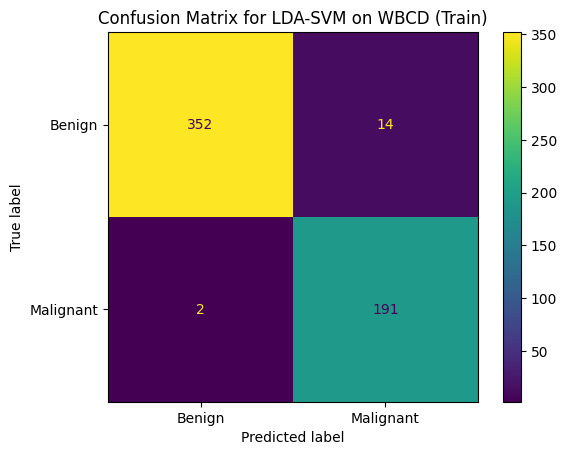

WBCD Train ROC AUC: 0.99


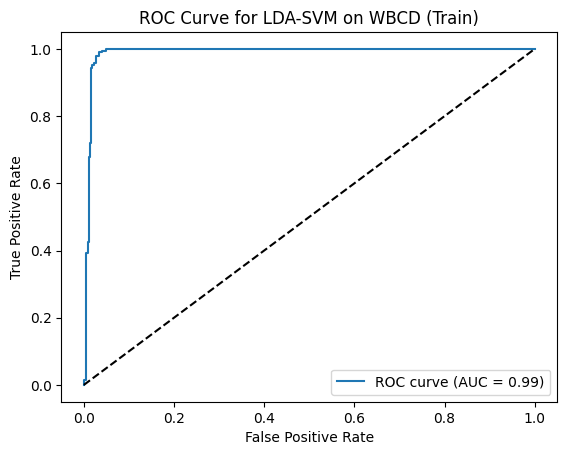


WBCD Test Confusion Matrix:
+------------------+---------------------+
| Predicted Benign | Predicted Malignant |
+------------------+---------------------+
|        89        |          3          |
|        1         |         47          |
+------------------+---------------------+


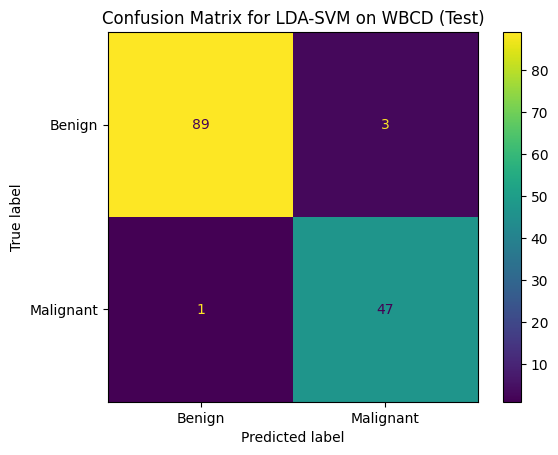

WBCD Test ROC AUC: 0.98


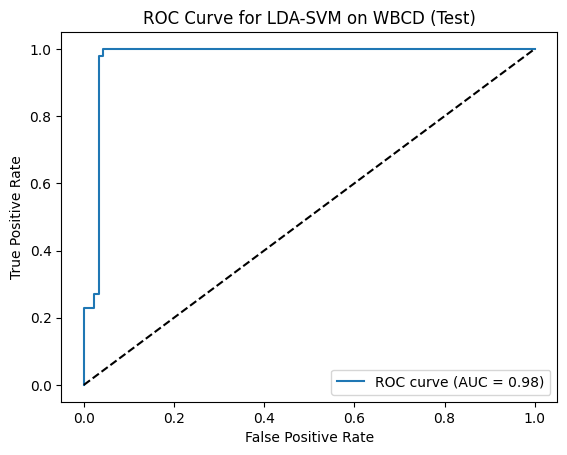

In [64]:
X_train_wbcd, X_test_wbcd, y_train_wbcd, y_test_wbcd = train_test_split(X_wbcd, y_wbcd, test_size=0.2, stratify=y_wbcd, random_state=42)
pipeline_wbcd = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced'))
])
pipeline_wbcd.fit(X_train_wbcd, y_train_wbcd)

# Confusion Matrix and ROC for WBCD Train
y_pred_train_wbcd = pipeline_wbcd.predict(X_train_wbcd)
y_prob_train_wbcd = pipeline_wbcd.predict_proba(X_train_wbcd)[:, 1]
cm_train_wbcd = confusion_matrix(y_train_wbcd, y_pred_train_wbcd)
print("\nWBCD Train Confusion Matrix:")
print(tabulate(cm_train_wbcd, headers=['Predicted Benign', 'Predicted Malignant'], tablefmt='pretty'))
disp_train_wbcd = ConfusionMatrixDisplay(confusion_matrix=cm_train_wbcd, display_labels=['Benign', 'Malignant'])
disp_train_wbcd.plot()
plt.title('Confusion Matrix for LDA-SVM on WBCD (Train)')
plt.show()

fpr_train_wbcd, tpr_train_wbcd, _ = roc_curve(y_train_wbcd, y_prob_train_wbcd)
roc_auc_train_wbcd = auc(fpr_train_wbcd, tpr_train_wbcd)
print(f"WBCD Train ROC AUC: {roc_auc_train_wbcd:.2f}")
plt.plot(fpr_train_wbcd, tpr_train_wbcd, label=f'ROC curve (AUC = {roc_auc_train_wbcd:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WBCD (Train)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix and ROC for WBCD Test
y_pred_test_wbcd = pipeline_wbcd.predict(X_test_wbcd)
y_prob_test_wbcd = pipeline_wbcd.predict_proba(X_test_wbcd)[:, 1]
cm_test_wbcd = confusion_matrix(y_test_wbcd, y_pred_test_wbcd)
print("\nWBCD Test Confusion Matrix:")
print(tabulate(cm_test_wbcd, headers=['Predicted Benign', 'Predicted Malignant'], tablefmt='pretty'))
disp_test_wbcd = ConfusionMatrixDisplay(confusion_matrix=cm_test_wbcd, display_labels=['Benign', 'Malignant'])
disp_test_wbcd.plot()
plt.title('Confusion Matrix for LDA-SVM on WBCD (Test)')
plt.show()

fpr_test_wbcd, tpr_test_wbcd, _ = roc_curve(y_test_wbcd, y_prob_test_wbcd)
roc_auc_test_wbcd = auc(fpr_test_wbcd, tpr_test_wbcd)
print(f"WBCD Test ROC AUC: {roc_auc_test_wbcd:.2f}")
plt.plot(fpr_test_wbcd, tpr_test_wbcd, label=f'ROC curve (AUC = {roc_auc_test_wbcd:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WBCD (Test)')
plt.legend(loc='lower right')
plt.show()


WPBC Train Confusion Matrix:
+-------------------------+----------------------+
| Predicted Nonrecurrence | Predicted Recurrence |
+-------------------------+----------------------+
|           90            |          30          |
|            9            |          29          |
+-------------------------+----------------------+


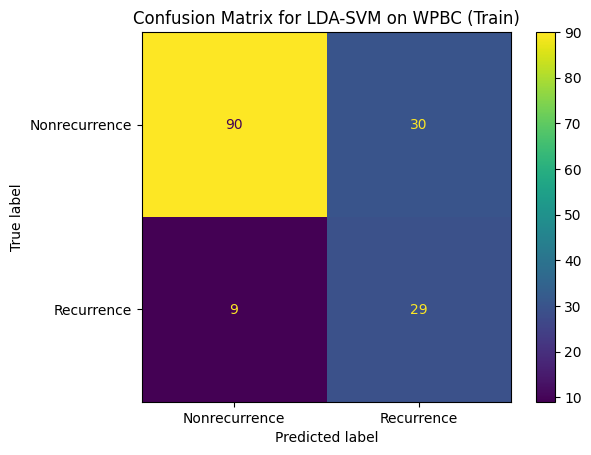

WPBC Train ROC AUC: 0.83


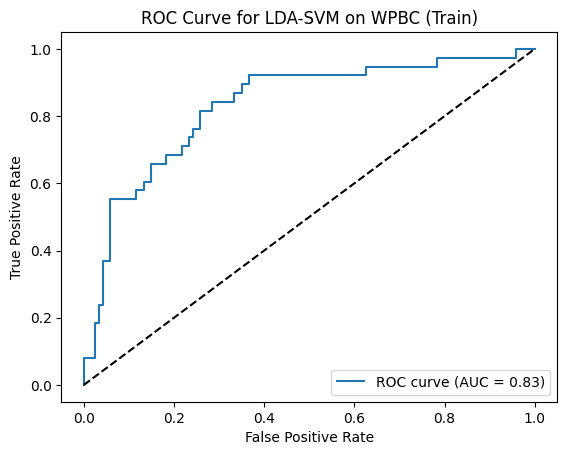


WPBC Test Confusion Matrix:
+-------------------------+----------------------+
| Predicted Nonrecurrence | Predicted Recurrence |
+-------------------------+----------------------+
|           24            |          7           |
|            6            |          3           |
+-------------------------+----------------------+


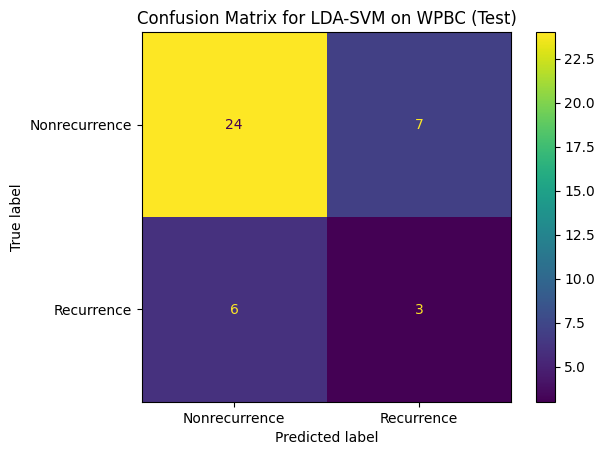

WPBC Test ROC AUC: 0.68


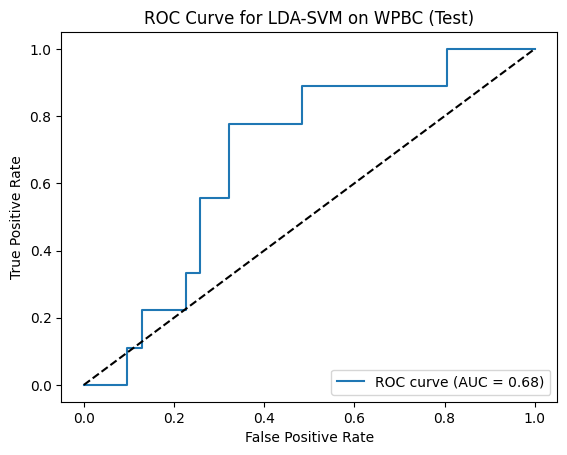

In [65]:
X_train_wpbc, X_test_wpbc, y_train_wpbc, y_test_wpbc = train_test_split(X_wpbc, y_wpbc, test_size=0.2, stratify=y_wpbc, random_state=42)
pipeline_wpbc = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced'))
])
pipeline_wpbc.fit(X_train_wpbc, y_train_wpbc)

# Confusion Matrix and ROC for WPBC Train
y_pred_train_wpbc = pipeline_wpbc.predict(X_train_wpbc)
y_prob_train_wpbc = pipeline_wpbc.predict_proba(X_train_wpbc)[:, 1]
cm_train_wpbc = confusion_matrix(y_train_wpbc, y_pred_train_wpbc)
print("\nWPBC Train Confusion Matrix:")
print(tabulate(cm_train_wpbc, headers=['Predicted Nonrecurrence', 'Predicted Recurrence'], tablefmt='pretty'))
disp_train_wpbc = ConfusionMatrixDisplay(confusion_matrix=cm_train_wpbc, display_labels=['Nonrecurrence', 'Recurrence'])
disp_train_wpbc.plot()
plt.title('Confusion Matrix for LDA-SVM on WPBC (Train)')
plt.show()

fpr_train_wpbc, tpr_train_wpbc, _ = roc_curve(y_train_wpbc, y_prob_train_wpbc)
roc_auc_train_wpbc = auc(fpr_train_wpbc, tpr_train_wpbc)
print(f"WPBC Train ROC AUC: {roc_auc_train_wpbc:.2f}")
plt.plot(fpr_train_wpbc, tpr_train_wpbc, label=f'ROC curve (AUC = {roc_auc_train_wpbc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WPBC (Train)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix and ROC for WPBC Test
y_pred_test_wpbc = pipeline_wpbc.predict(X_test_wpbc)
y_prob_test_wpbc = pipeline_wpbc.predict_proba(X_test_wpbc)[:, 1]
cm_test_wpbc = confusion_matrix(y_test_wpbc, y_pred_test_wpbc)
print("\nWPBC Test Confusion Matrix:")
print(tabulate(cm_test_wpbc, headers=['Predicted Nonrecurrence', 'Predicted Recurrence'], tablefmt='pretty'))
disp_test_wpbc = ConfusionMatrixDisplay(confusion_matrix=cm_test_wpbc, display_labels=['Nonrecurrence', 'Recurrence'])
disp_test_wpbc.plot()
plt.title('Confusion Matrix for LDA-SVM on WPBC (Test)')
plt.show()

fpr_test_wpbc, tpr_test_wpbc, _ = roc_curve(y_test_wpbc, y_prob_test_wpbc)
roc_auc_test_wpbc = auc(fpr_test_wpbc, tpr_test_wpbc)
print(f"WPBC Test ROC AUC: {roc_auc_test_wpbc:.2f}")
plt.plot(fpr_test_wpbc, tpr_test_wpbc, label=f'ROC curve (AUC = {roc_auc_test_wpbc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WPBC (Test)')
plt.legend(loc='lower right')
plt.show()